In [ ]:
'''

测试算法：随机森林

测试数据集：iawe数据集
----------------
    描述：选取冰箱、加湿器、电脑和电视四种电器
    时长：2013-08-04 18：40至2013-08-04 19：25，共45分钟
    数量：压缩前9542个数据，压缩后1906个数据
    
测试结果：准确率99.83%

'''

In [1]:
#check path
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [2]:
#import tools
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from disaggregate.data_extender import extend_and_combine
from disaggregate.pca_and_rf import *
%matplotlib inline

In [3]:
#define a plot function
color_list = ['r', 'y', 'g', 'c', 'b', 'm', 'k', 'w']
def plot(*raws):
    plt.figure(figsize = [20, 20])
    for index, raw in enumerate(raws):
        plt.plot(raw.index, raw.values, color_list[index])
    plt.show()

In [4]:
#import data
with pd.HDFStore('../dataset_test/iawe.h5') as f:
    fg = f.get('/building1/elec/meter3')['power']['apparent']['2013-08-04 18:40:00+05:30':'2013-08-04 19:25:00+05:30']
    wp = f.get('/building1/elec/meter11')['power']['apparent']['2013-08-04 18:40:00+05:30':'2013-08-04 19:25:00+05:30']
    cp = f.get('/building1/elec/meter7')['power']['apparent']['2013-08-04 18:40:00+05:30':'2013-08-04 19:25:00+05:30']
    tv = f.get('./building1/elec/meter10')['power']['apparent']['2013-08-04 18:40:00+05:30':'2013-08-04 19:25:00+05:30']

/home/redbeancakeli/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


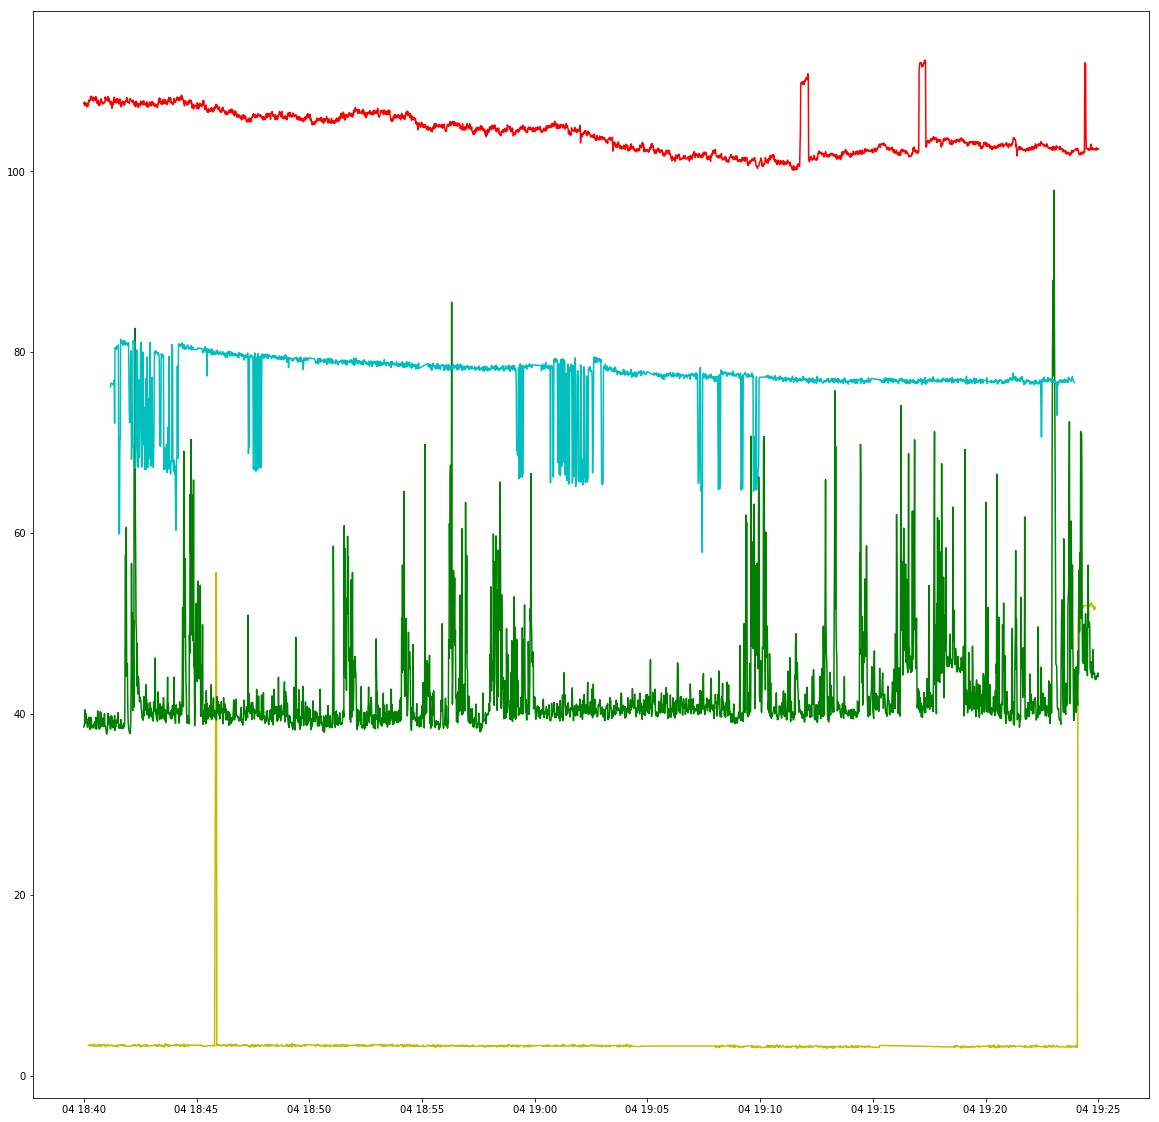

In [5]:
#plot data
plot(fg, wp, cp, tv)

In [6]:
#entend and combine dataset
dataset, labels = extend_and_combine(5, fg.values, wp.values, cp.values, tv.values)

extending dataset 0  size: (2654,) 

combining dataset 0  size: (530, 8) 

extending dataset 1  size: (1811,) 

combining dataset 1  size: (362, 8) 

extending dataset 2  size: (2683,) 

combining dataset 2  size: (536, 8) 

extending dataset 3  size: (2394,) 

combining dataset 3  size: (478, 8) 

done!


In [7]:
#split dataset
x_train,x_test,y_train,y_test = train_test_split(dataset, labels, test_size = 0.3)

/home/redbeancakeli/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Trained: displaying 100 % data...



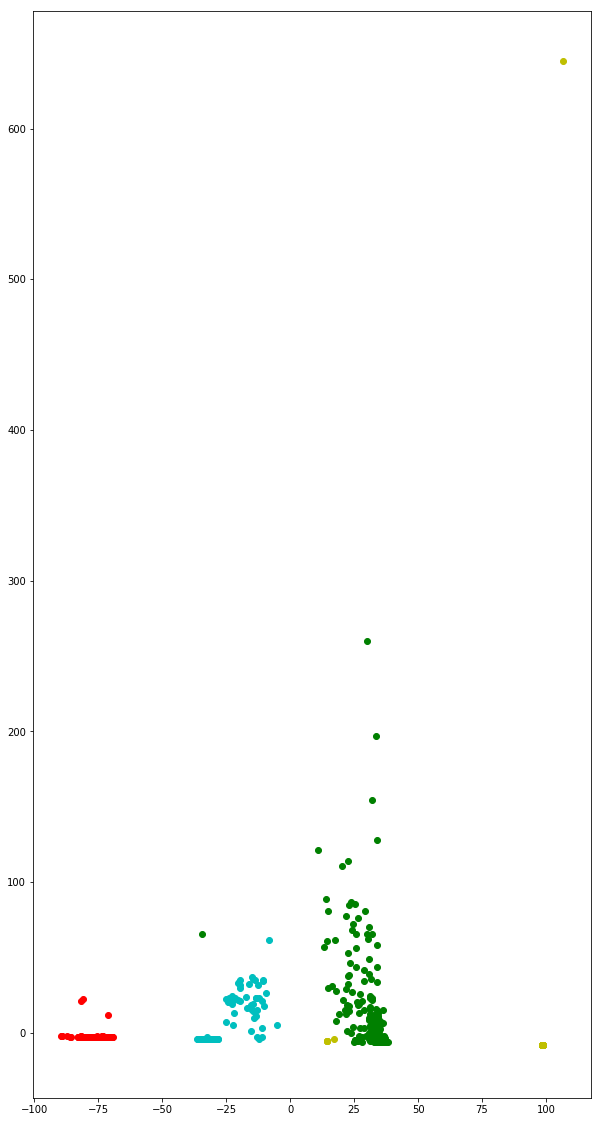

True: displaying 100 % data...



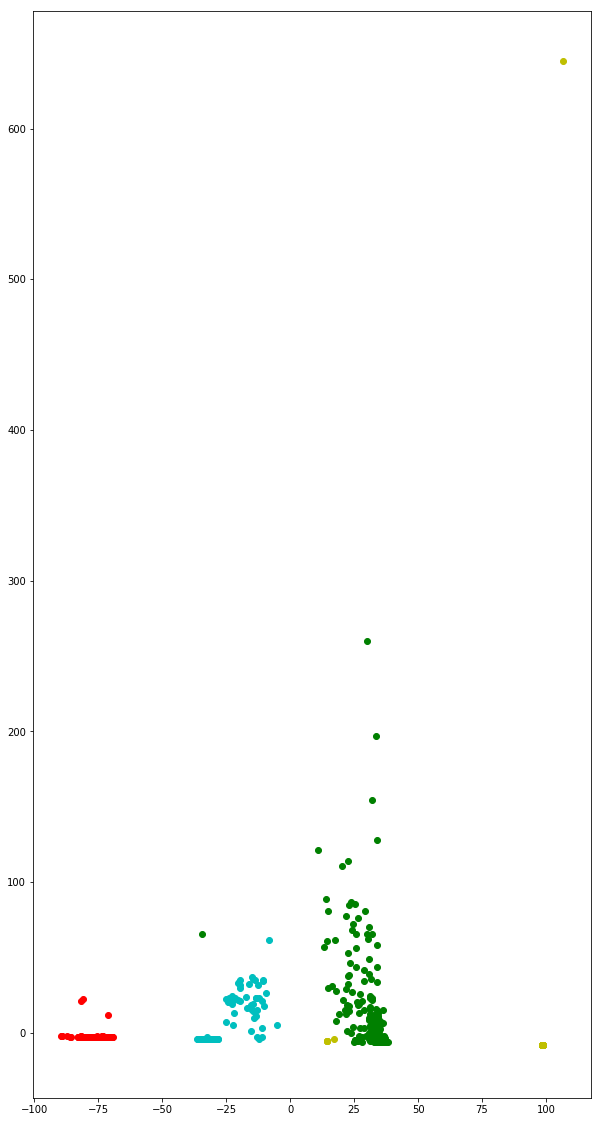

In [8]:
#train dataset
model = train(x_train, y_train, 4)

Predict: displaying 100 % data...



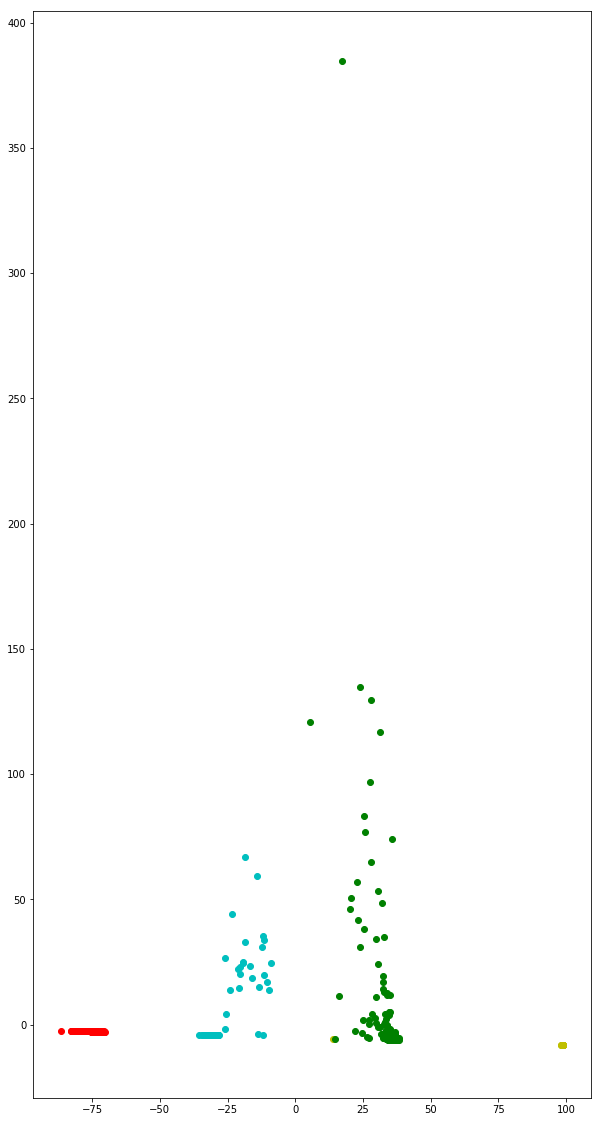

True: displaying 100 % data...



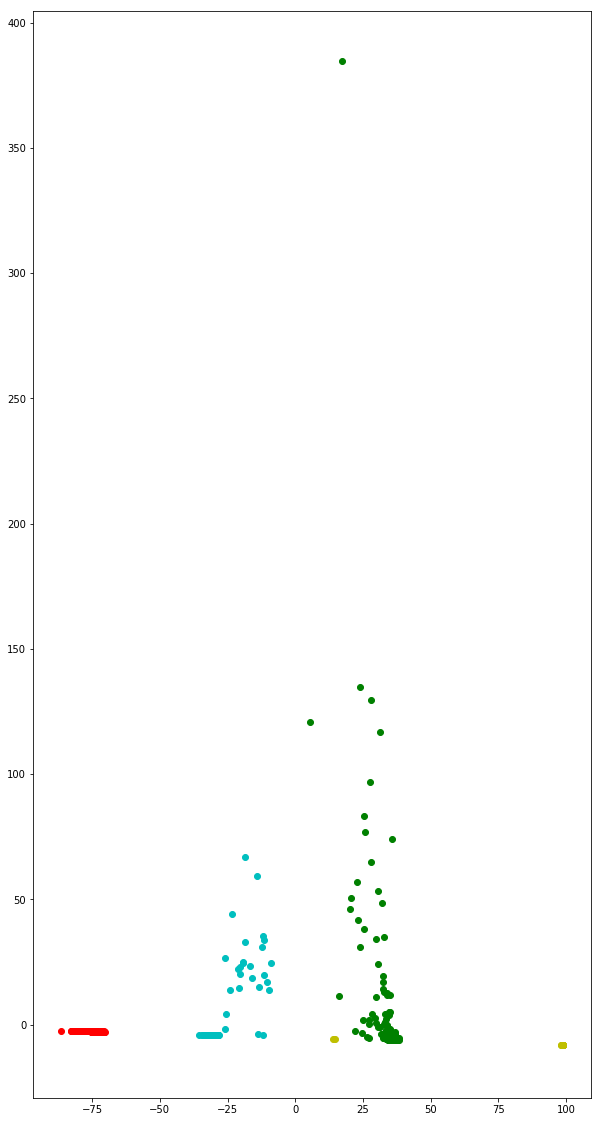

In [9]:
#predict
pred = predict_all(x_test, y_test, 4, model)

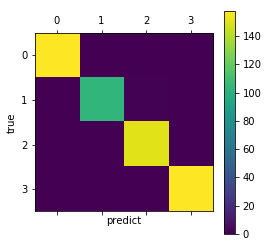

[[158   0   0   0]
 [  0 104   1   0]
 [  0   0 151   0]
 [  0   0   0 158]]


In [10]:
#confusion matrix
cm = confusion_matrix(y_test, pred)
plt.matshow(cm)
plt.colorbar()
plt.xlabel('predict')
plt.ylabel('true')
plt.show()
print(cm)

In [11]:
#accuracy
acc = sum(cm.diagonal())/sum(sum(cm))
print('accuracy: ', acc*100, '%')

accuracy:  99.82517482517483 %
